# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

     |████████████████████████████████| 557 kB 2.2 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=737a4d9e26a431806c8da1d22db2f580aa046586ad62c433f7dfb1c23893f8c9
  Stored in directory: /Users/justine.skyler/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

record = 0
set = 1

city_name = []
lat = []
long = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []


print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    
    #print(f"{query_url}+{city}")
    
    if record == 50:
        record = 0
        set += 1
    record += 1
    try:
        weather_response = requests.get(query_url+city).json()
        city_name.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        long.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        clouds.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        
        print(f"Processing Record {record} of Set {set} | {city}")
        
        
    except:
        print("City not found. Skipping...")
        continue
    
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | lysyye gory
Processing Record 6 of Set 1 | acapulco
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | aripuana
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | matay
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | valparaiso
Processing Record 14 of Set 1 | konibodom
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | korla
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | kodiak
City not found. Skipping...
Processing Record 23 of Set 1 | badnawar
Proce

City not found. Skipping...
Processing Record 6 of Set 5 | pingzhuang
Processing Record 7 of Set 5 | fairbanks
Processing Record 8 of Set 5 | pali
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | sorland
City not found. Skipping...
Processing Record 12 of Set 5 | salimpur
Processing Record 13 of Set 5 | jiayuguan
Processing Record 14 of Set 5 | verkhnyaya toyma
Processing Record 15 of Set 5 | sim
City not found. Skipping...
Processing Record 17 of Set 5 | leh
Processing Record 18 of Set 5 | saint augustine
City not found. Skipping...
Processing Record 20 of Set 5 | saldanha
Processing Record 21 of Set 5 | pontian kecil
Processing Record 22 of Set 5 | sisimiut
Processing Record 23 of Set 5 | wajid
Processing Record 24 of Set 5 | patan
City not found. Skipping...
Processing Record 26 of Set 5 | tonantins
Processing Record 27 of Set 5 | kamenka
Processing Record 28 of Set 5 | hasaki
Processing Record 29 of Set 5 | norman wells
Processing Record 30 of Set 5 | yun

Processing Record 14 of Set 9 | xunchang
Processing Record 15 of Set 9 | kananga
Processing Record 16 of Set 9 | qaqortoq
City not found. Skipping...
Processing Record 18 of Set 9 | netivot
Processing Record 19 of Set 9 | sobolevo
Processing Record 20 of Set 9 | melfi
Processing Record 21 of Set 9 | maputo
Processing Record 22 of Set 9 | gorom-gorom
Processing Record 23 of Set 9 | ginda
Processing Record 24 of Set 9 | torres
Processing Record 25 of Set 9 | tacuati
Processing Record 26 of Set 9 | kousseri
Processing Record 27 of Set 9 | gao
Processing Record 28 of Set 9 | solwezi
Processing Record 29 of Set 9 | sendafa
Processing Record 30 of Set 9 | huarmey
Processing Record 31 of Set 9 | vila velha
Processing Record 32 of Set 9 | martaban
Processing Record 33 of Set 9 | padang
Processing Record 34 of Set 9 | mweka
Processing Record 35 of Set 9 | hohhot
Processing Record 36 of Set 9 | isla mujeres
Processing Record 37 of Set 9 | port hardy
Processing Record 38 of Set 9 | half moon bay


Processing Record 15 of Set 13 | qinhuangdao
Processing Record 16 of Set 13 | clovis
City not found. Skipping...
Processing Record 18 of Set 13 | yumen
Processing Record 19 of Set 13 | lundazi
Processing Record 20 of Set 13 | lucea
Processing Record 21 of Set 13 | lagoa
Processing Record 22 of Set 13 | lorengau
Processing Record 23 of Set 13 | luyang
Processing Record 24 of Set 13 | santa cruz
Processing Record 25 of Set 13 | verkhoyansk
City not found. Skipping...
Processing Record 27 of Set 13 | dukat
Processing Record 28 of Set 13 | lavrentiya


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
wx_dict = {'City':city_name,
          'Lat':lat,
          'Lng':long,
          'Max Temp':max_temp,
          'Humidity':humidity,
          'Cloudiness':clouds,
          'Wind Speed':wind_speed,
          'Country':country,
          'Date':date}

wx_summary = pd.DataFrame(wx_dict)

wx_summary.to_csv(output_data_file)

wx_summary

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,63.00,77,75,5.82,ZA,1605317506
1,Ushuaia,-54.80,-68.30,42.80,85,40,28.86,AR,1605317627
2,Hermanus,-34.42,19.23,60.01,84,79,1.01,ZA,1605317762
3,Ponta do Sol,32.67,-17.10,69.80,94,75,16.11,PT,1605317762
4,Lysyye Gory,51.55,44.84,29.48,97,100,11.18,RU,1605317763
...,...,...,...,...,...,...,...,...,...
572,Luyang,27.62,110.10,62.28,62,0,2.57,CN,1605317874
573,Santa Cruz de la Sierra,-17.80,-63.17,78.80,78,2,10.29,BO,1605317875
574,Verkhoyansk,67.54,133.38,-11.02,87,91,1.28,RU,1605317875
575,Dukat,62.55,155.55,-3.05,90,100,3.24,RU,1605317875


In [25]:
wx_analysis = pd.DataFrame(wx_summary.describe())
wx_analysis

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,21.302218,19.507574,55.349671,76.365685,50.218371,7.422062,1.605318e+09
std,32.721012,88.381732,24.252362,18.067286,40.225676,5.426148,8.291901e+01
min,-54.800000,-175.200000,-19.930000,7.000000,0.000000,0.430000,1.605317e+09
25%,-5.200000,-58.620000,39.000000,67.000000,3.000000,3.360000,1.605318e+09
50%,25.770000,23.680000,62.600000,81.000000,49.000000,6.020000,1.605318e+09
75%,49.220000,93.280000,74.890000,90.000000,90.000000,10.110000,1.605318e+09
max,78.220000,178.420000,98.600000,100.000000,100.000000,39.150000,1.605318e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

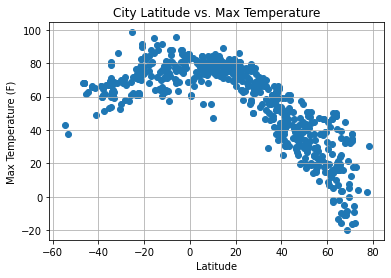

In [26]:
plt.scatter(wx_summary["Lat"],wx_summary["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

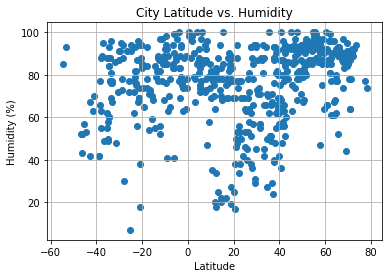

In [27]:
plt.scatter(wx_summary["Lat"],wx_summary["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

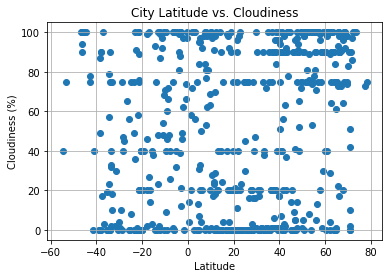

In [28]:
plt.scatter(wx_summary["Lat"],wx_summary["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

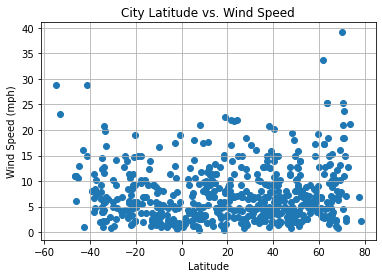

In [29]:
plt.scatter(wx_summary["Lat"],wx_summary["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

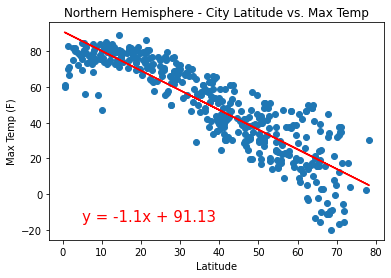

The r-value is: 0.7704000778166791


In [30]:
northern_hem = wx_summary.loc[wx_summary["Lat"] > 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem["Lat"],northern_hem["Max Temp"])
regress_values = northern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["Lat"],northern_hem["Max Temp"])
plt.plot(northern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,-15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - City Latitude vs. Max Temp")

plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

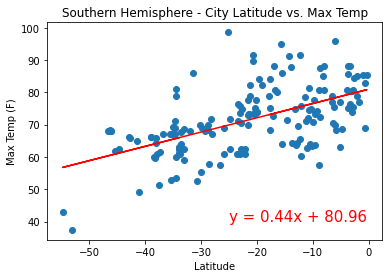

The r-value is: 0.3230580756773985


In [35]:
southern_hem = wx_summary.loc[wx_summary["Lat"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem["Lat"],southern_hem["Max Temp"])
regress_values = southern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["Lat"],southern_hem["Max Temp"])
plt.plot(southern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - City Latitude vs. Max Temp")

plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

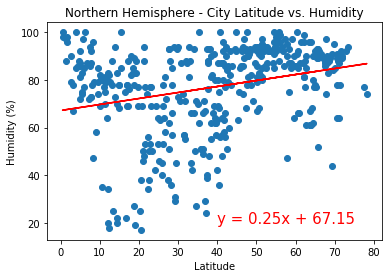

The r-value is: 0.07465595654379087


In [36]:
northern_hem = wx_summary.loc[wx_summary["Lat"] > 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem["Lat"],northern_hem["Humidity"])
regress_values = northern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["Lat"],northern_hem["Humidity"])
plt.plot(northern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity")

plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

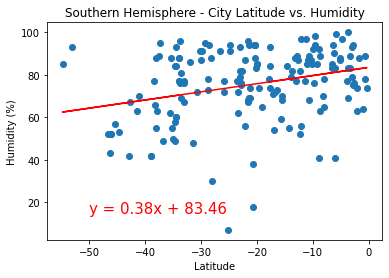

The r-value is: 0.08955648791676737


In [37]:
southern_hem = wx_summary.loc[wx_summary["Lat"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem["Lat"],southern_hem["Humidity"])
regress_values = southern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["Lat"],southern_hem["Humidity"])
plt.plot(southern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - City Latitude vs. Humidity")

plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

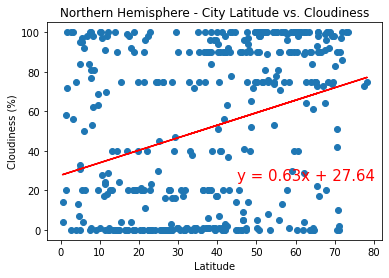

The r-value is: 0.09689269359800634


In [38]:
northern_hem = wx_summary.loc[wx_summary["Lat"] > 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem["Lat"],northern_hem["Cloudiness"])
regress_values = northern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["Lat"],northern_hem["Cloudiness"])
plt.plot(northern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")

plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

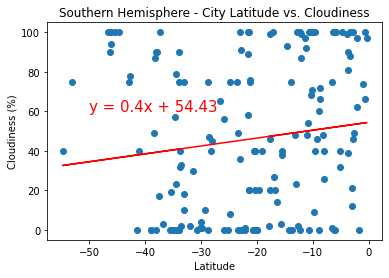

The r-value is: 0.01880031041517789


In [39]:
southern_hem = wx_summary.loc[wx_summary["Lat"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem["Lat"],southern_hem["Cloudiness"])
regress_values = southern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["Lat"],southern_hem["Cloudiness"])
plt.plot(southern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")

plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

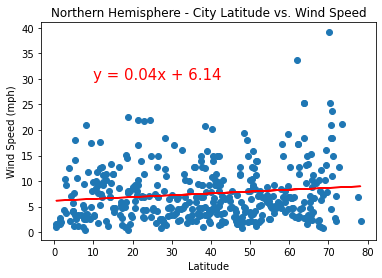

The r-value is: 0.01762681383657324


In [41]:
northern_hem = wx_summary.loc[wx_summary["Lat"] > 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hem["Lat"],northern_hem["Wind Speed"])
regress_values = northern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hem["Lat"],northern_hem["Wind Speed"])
plt.plot(northern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")

plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

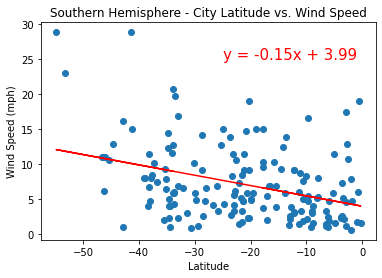

The r-value is: 0.1339436888876508


In [43]:
southern_hem = wx_summary.loc[wx_summary["Lat"] < 0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hem["Lat"],southern_hem["Wind Speed"])
regress_values = southern_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hem["Lat"],southern_hem["Wind Speed"])
plt.plot(southern_hem["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")

plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

print(f"The r-value is: {rvalue**2}")